# 0. Imports 
Here, libraries will be imported, functions created and data loaded.

In [1]:
import pandas  as pd 
import numpy   as np  
import seaborn as sns 
import datetime 

import matplotlib.pyplot as plt 
%matplotlib inline 

from scipy    import stats    as ss 
from tabulate import tabulate
from datetime import datetime


## 0.1 Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 25
    #display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()

def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 0.2 Load Data

In [3]:
url1 = "https://drive.google.com/file/d/1lcb1YkTYCdOYnz2SirRHj2RkrI9kr2UB/view?usp=sharing"
file_id = url1.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df_raw = pd.read_csv(dwn_url)

#df_raw = pd.read_csv("kc_house_data.csv", low_memory=False)
df_raw.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 1. Data Description 
The description of the data will be carried out and also the Descriptive Statistics to describe the data.

In [4]:
df1 = df_raw.copy()
df1.shape

(21613, 21)

## 1.1 Data Types

In [5]:
df1.dtypes 

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 1.2 Check NA

In [6]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.3 Change Types

In [7]:
#Alterando os tipos das variáveis bathrooms e floors de float para int
df1['bathrooms'] = df1['bathrooms'].astype('int64')
df1['floors'] = df1['floors'].astype('int64')

#Alterando tipo do campo date  
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')
df1['date'] = df1['date'].dt.strftime('%Y-%m-%d') 

## 1.4 Outliers

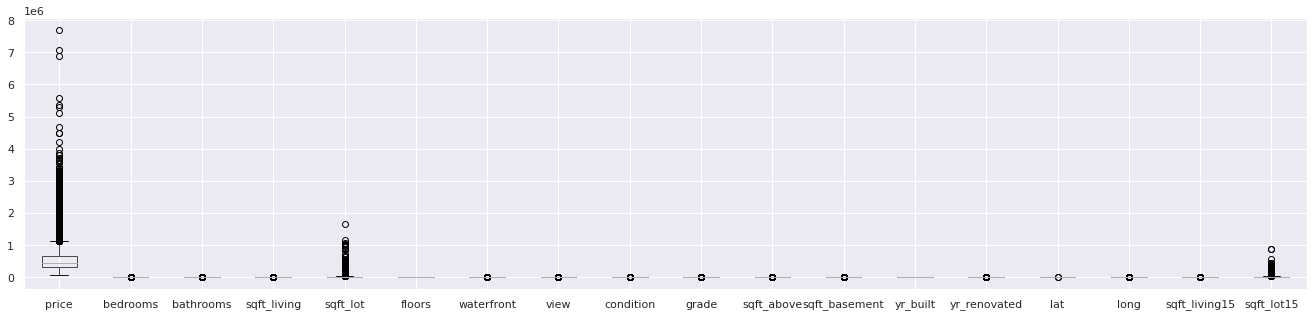

In [8]:
# The outliers are normal
df1.drop(["id", "zipcode"], axis = 1).boxplot(figsize = (23, 5)); 

## 1.4 Descriptive Statistical 

In [9]:
n_attributes = df1.select_dtypes(include=['int64','float64'])

#Remove years and id
cols_drop = ['yr_built','yr_renovated','id']
n_attributes = n_attributes.drop(cols_drop, axis=1) 

### 1.4.1 Numerical Attributes 

In [10]:
#Central Tendence 
ct1 = pd.DataFrame(n_attributes.apply(np.mean)).T 
ct2 = pd.DataFrame(n_attributes.apply(np.median)).T

#Dispersion = std, min, max, range, skew, kurtosis 
d1 = pd.DataFrame(n_attributes.apply(np.std)).T
d2 = pd.DataFrame(n_attributes.apply(min)).T
d3 = pd.DataFrame(n_attributes.apply(max)).T
d4 = pd.DataFrame(n_attributes.apply(lambda x: x.max() - x.min())).T 
d5 = pd.DataFrame(n_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(n_attributes.apply(lambda x: x.kurtosis())).T 

#Concatenate 
m = pd.concat([d1, d2, d3, d4, d5, d6,ct1,ct2]).T.reset_index()
m.columns = ['attributes','std','min','max','range','skew','kurtosis','mean','median'] 
m

,attributes,std,min,max,range,skew,kurtosis,mean,median
0,price,367118.703181,75000.0000,7.700000e+06,7.625000e+06,4.024069,34.585540,540088.141767,450000.0000
1,bedrooms,0.930040,0.0000,3.300000e+01,3.300000e+01,1.974300,49.063653,3.370842,3.0000
2,bathrooms,0.734856,0.0000,8.000000e+00,8.000000e+00,0.902105,1.989574,1.749734,2.0000
3,sqft_living,918.419649,290.0000,1.354000e+04,1.325000e+04,1.471555,5.243093,2079.899736,1910.0000
4,sqft_lot,41419.553273,520.0000,1.651359e+06,1.650839e+06,13.060019,285.077820,15106.967566,7618.0000
5,floors,0.551881,1.0000,3.000000e+00,2.000000e+00,0.726178,-0.551411,1.446213,1.0000
6,waterfront,0.086515,0.0000,1.000000e+00,1.000000e+00,11.385108,127.632494,0.007542,0.0000
7,view,0.766300,0.0000,4.000000e+00,4.000000e+00,3.395750,10.893022,0.234303,0.0000
8,condition,0.650728,1.0000,5.000000e+00,4.000000e+00,1.032805,0.525764,3.409430,3.0000
9,grade,1.175432,1.0000,1.300000e+01,1.200000e+01,0.771103,1.190932,7.656873,7.0000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


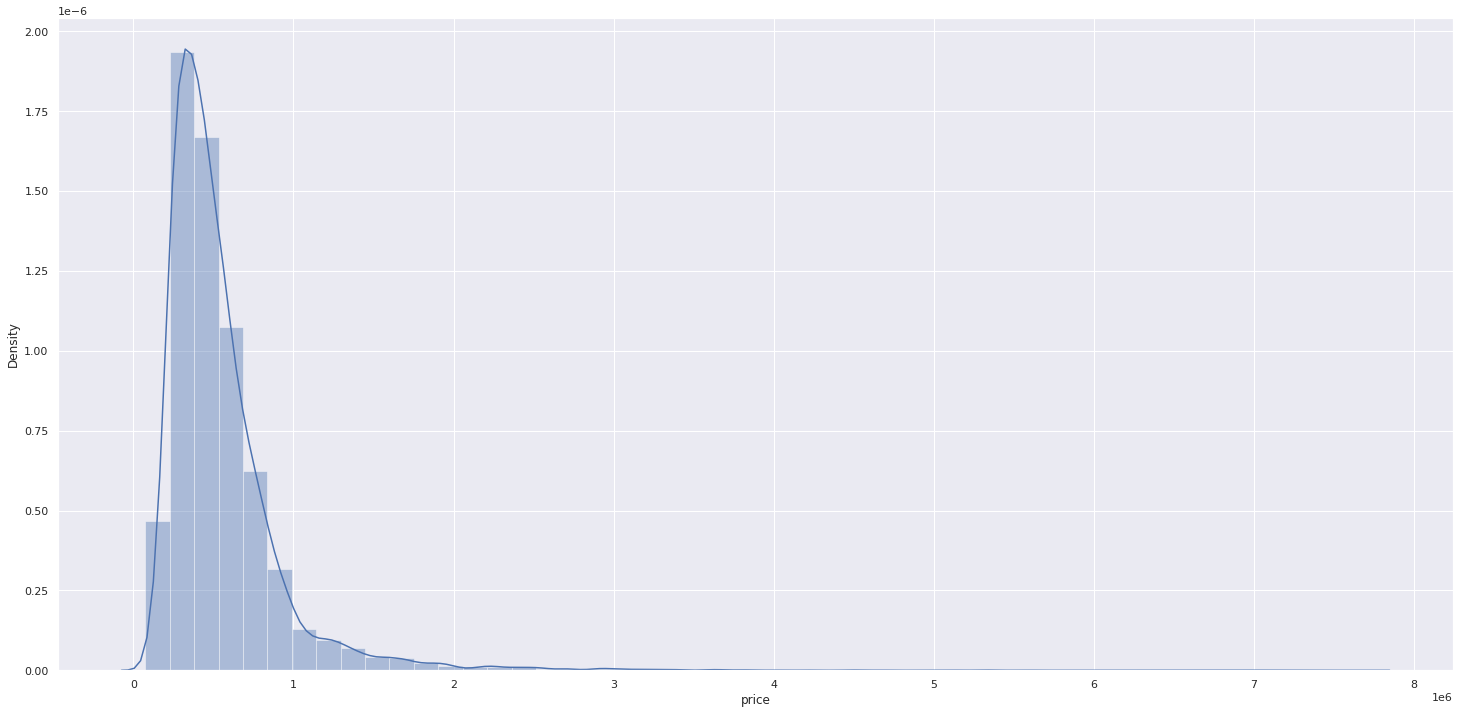

In [11]:
sns.distplot(df1['price']);

# 2. Feature Engineering 
Data will be derived and new variables will be created for better development of this project.

In [12]:
df2 = df1.copy()

## 2.1 Feature Engineering

In [13]:
#date - year 
df2['date'] = pd.to_datetime(df2['date'], errors='coerce')
df2['year_sold'] = df2['date'].dt.year

#date - month 
df2['month_sold'] = df2['date'].dt.month

#date - day 
df2['day_sold'] = df2['date'].dt.day 


#date - weekday
#Creating map of the days of week
weekday_map = {0: 'Monday' , 1: 'Tuesday' , 2: 'Wednesday' , 3: 'Thursday' , 4: 'Friday' , 5: 'Saturday' , 6: 'Sunday'}
df2['weekday_sold'] = df2['date'].dt.weekday.map(weekday_map) 

In [14]:
# Discovering the season of the year
df2['season'] = df2.apply( lambda x: 'summer' if ( x['month_sold'] >=6 and x['month_sold'] <=8 ) else 'winter' if ( x['month_sold'] ==12 or x['month_sold'] ==2 or x['month_sold'] ==1 ) else 'fall' if ( x['month_sold'] >=9 and x['month_sold'] <=11 ) else 'spring' if ( x['month_sold'] >=3 and x['month_sold'] <=5 ) else '' , axis=1 )

In [15]:
df2.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold,weekday_sold,season
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13,Monday,fall
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,Tuesday,winter
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25,Wednesday,winter
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9,Tuesday,winter
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18,Wednesday,winter


# 3. Exploratory Data Analysis 
In the Exploratory Data Analysis, hypotheses will be raised in order to generate insights for the business team and also identify the correlation between variables and 'price'.

In [16]:
df3 = df2.copy()

## 3.1 Univariate Variable 

### 3.1.1 Response Variable 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


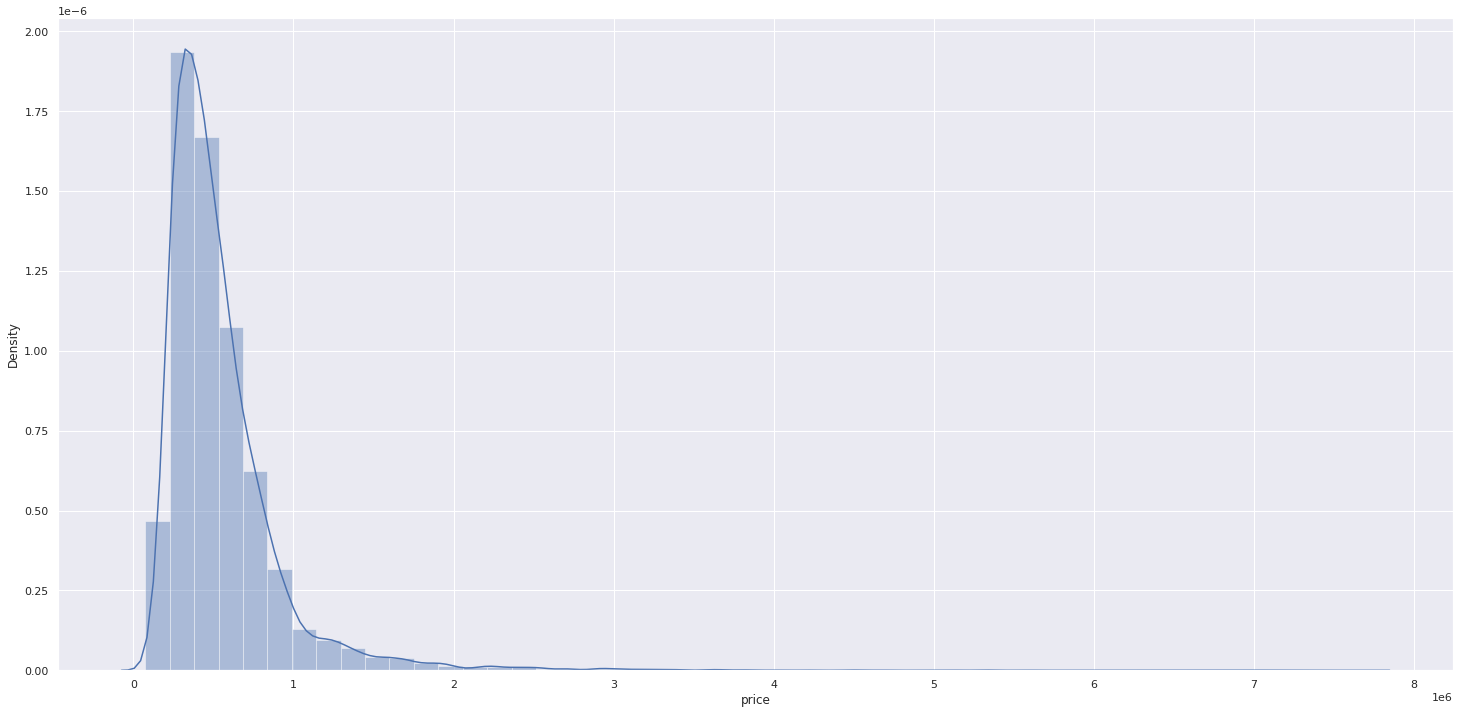

In [17]:
sns.distplot(df3['price'])

### 3.1.2 Numerical Variable

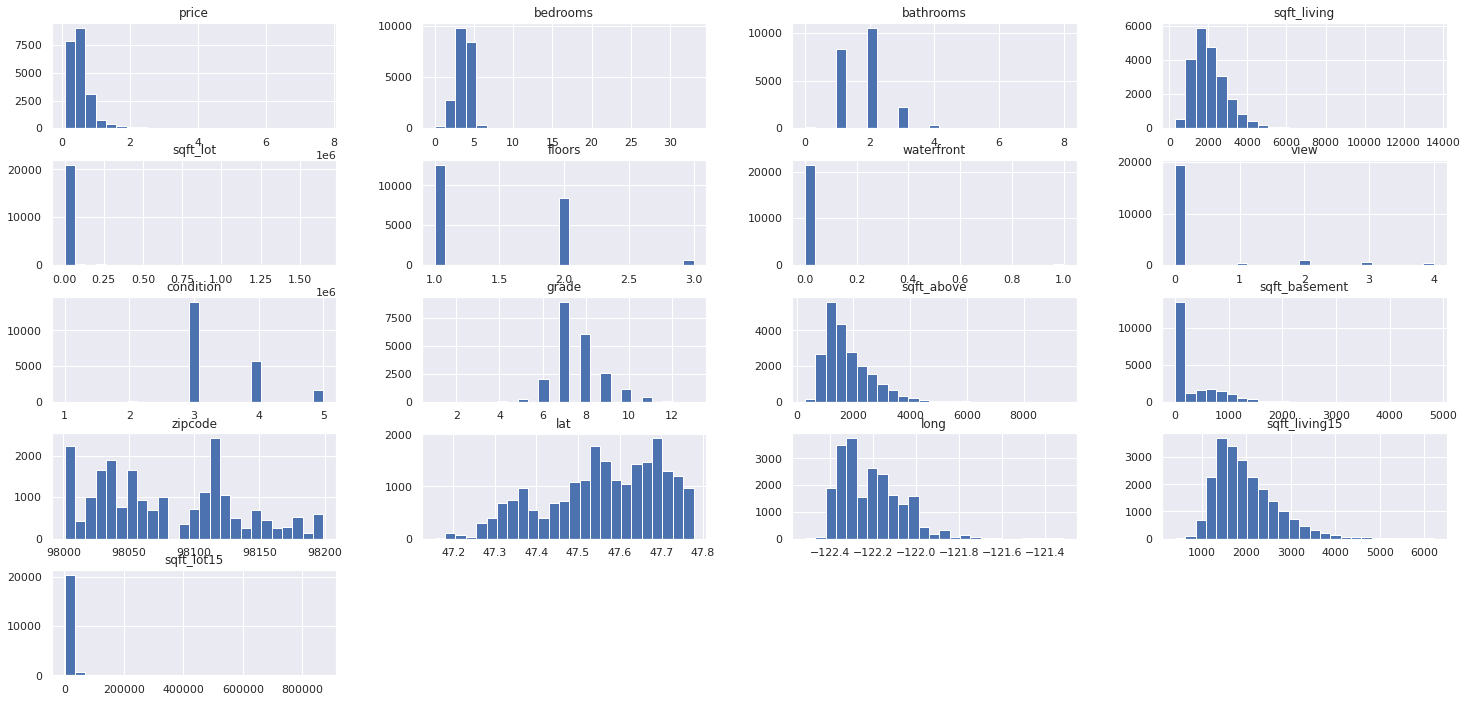

In [18]:
n_attributes.hist(bins=25);

### 3.1.3 Categorical Variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


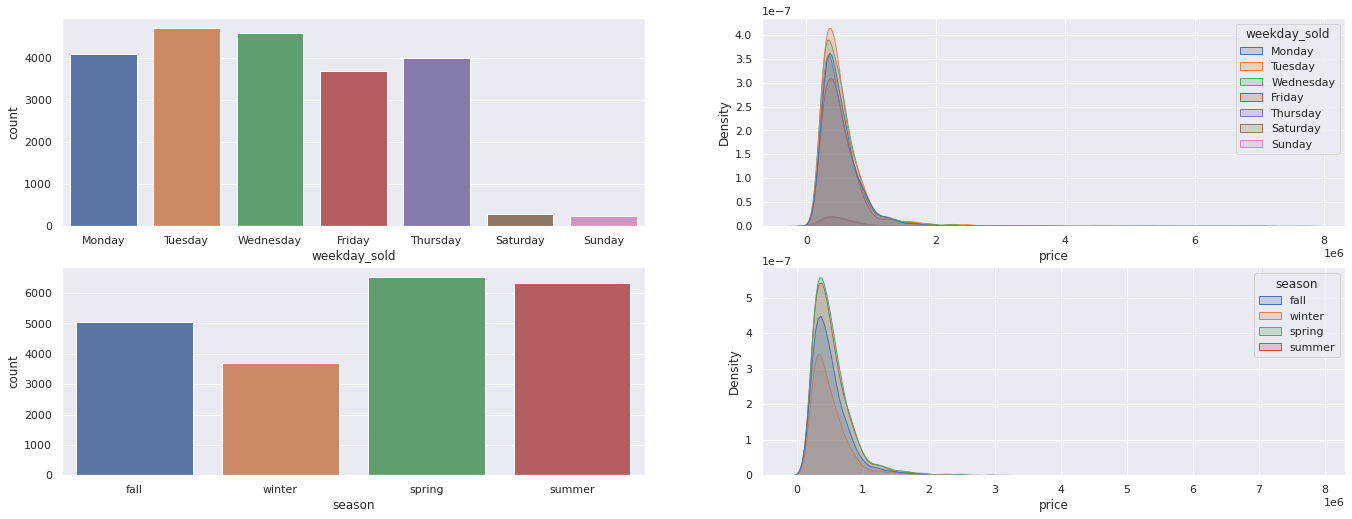

In [19]:
f = plt.figure(figsize=(23,13))
#weekday_sold 
plt.subplot(3,2,1)
sns.countplot(df3['weekday_sold']);

plt.subplot(3,2,2)
a = sns.kdeplot(data=df3, x='price', hue='weekday_sold', shade=True, palette='deep');

plt.subplot(3,2,3)
sns.countplot(df3['season']);

plt.subplot(3,2,4)
a = sns.kdeplot(data=df3, x='price', hue='season', shade=True, palette='deep');



## 3.2 Bivariate Analysis

Note: In this section pct_change will be used.

It calculates the percentage change **between the current element and a previous one.**

It also calculates the percent change from the immediately preceding row by default. This is useful for comparing the percentage change over a series of time elements. 

More: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html

### **H1: Properties that overlook the water are 20% more expensive, on average**

__False: Houses with a view of the water are 200% more expensive__

posx and posy should be finite values
posx and posy should be finite values


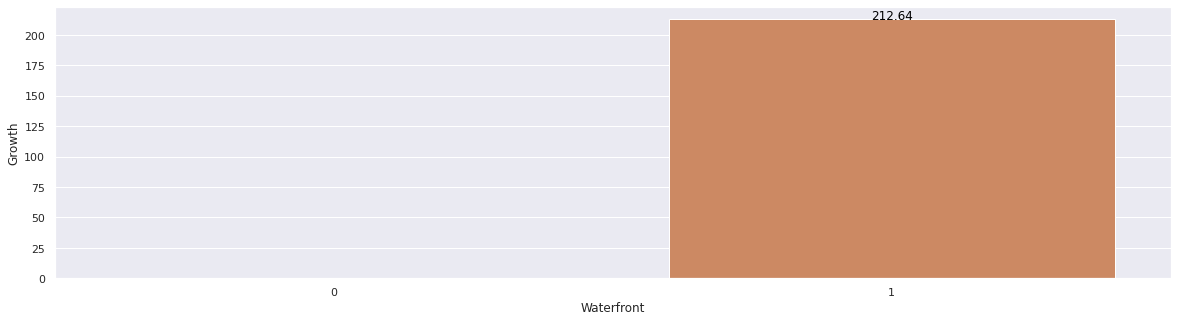

In [20]:
f = plt.figure(figsize=(20,5))
aux = df3[['waterfront','price']].groupby('waterfront').mean().reset_index()
aux['growth'] = 100 * aux['price'].pct_change()
#aux.head(5)
g = sns.barplot(x='waterfront', y='growth', data=aux);  

g.set_xlabel('Waterfront');
g.set_ylabel('Growth');

for index, row in aux.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

plt.show();

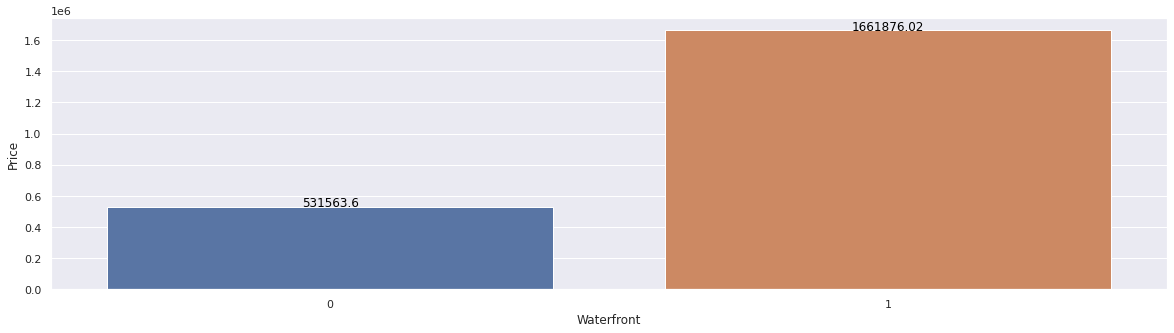

In [21]:
f = plt.figure(figsize=(20,5))
aux = df3[['waterfront','price']].groupby('waterfront').mean().reset_index()
aux['growth'] = 100 * aux['price'].pct_change()
#aux.head(5)
g = sns.barplot(x='waterfront', y='price', data=aux);  

g.set_xlabel('Waterfront');
g.set_ylabel('Price');

for index, row in aux.iterrows():
    g.text(row.name,row.price, round(row.price,2), color='black', ha="center")

plt.show();


### **H2: Properties with a construction date less than 1955 are 50% cheaper, on average.**

__False: Properties with a construction date less than 1955 are 15% cheaper__

posx and posy should be finite values
posx and posy should be finite values


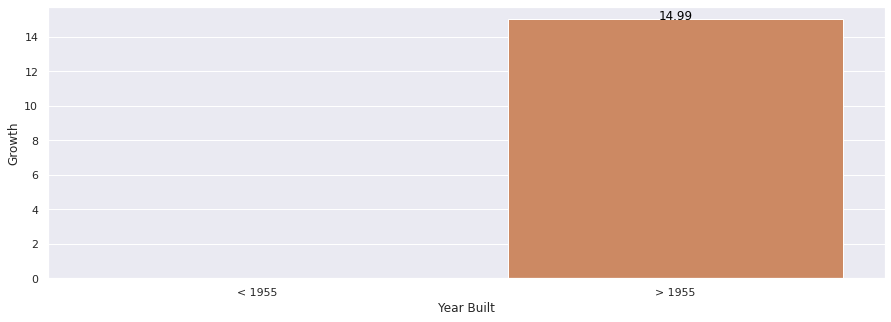

In [22]:
f = plt.figure(figsize=(15,5))
aux1 = df3[['yr_built','price']].groupby('yr_built').mean().reset_index()
aux1['yr_built2'] = aux1.apply(lambda x: '< 1955' if x['yr_built'] < 1995 else '> 1955', axis=1)

aux2 = aux1[['yr_built2','price']].groupby('yr_built2').mean().reset_index()
aux2['growth'] = 100 * aux2['price'].pct_change()
g = sns.barplot(x='yr_built2', y='growth', data=aux2); 
g.set_xlabel('Year Built');
g.set_ylabel('Growth');


for index, row in aux2.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

plt.show();

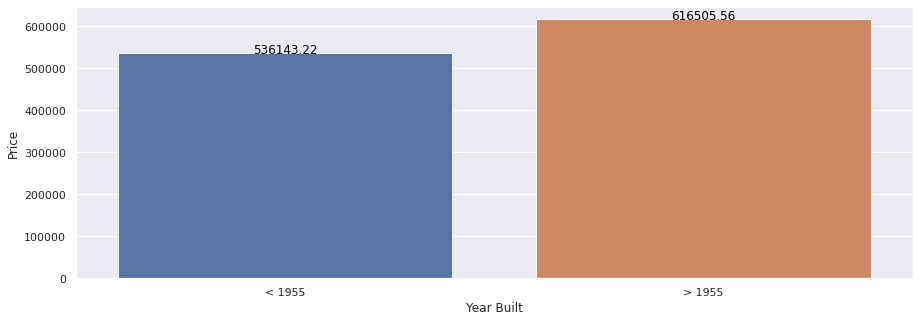

In [23]:
f = plt.figure(figsize=(15,5))
aux1 = df3[['yr_built','price']].groupby('yr_built').mean().reset_index()
aux1['yr_built2'] = aux1.apply(lambda x: '< 1955' if x['yr_built'] < 1995 else '> 1955', axis=1)

aux2 = aux1[['yr_built2','price']].groupby('yr_built2').mean().reset_index()
aux2['growth'] = 100 * aux2['price'].pct_change()
g = sns.barplot(x='yr_built2', y='price', data=aux2); 
g.set_xlabel('Year Built');
g.set_ylabel('Price');


for index, row in aux2.iterrows():
    g.text(row.name,row.price, round(row.price,2), color='black', ha="center")

plt.show();

### **H3: Properties without a basement have a total area (sqft_lot), 40% larger than properties with a basement.**

__False: Properties without a basement are only 18% larger.__



posx and posy should be finite values
posx and posy should be finite values


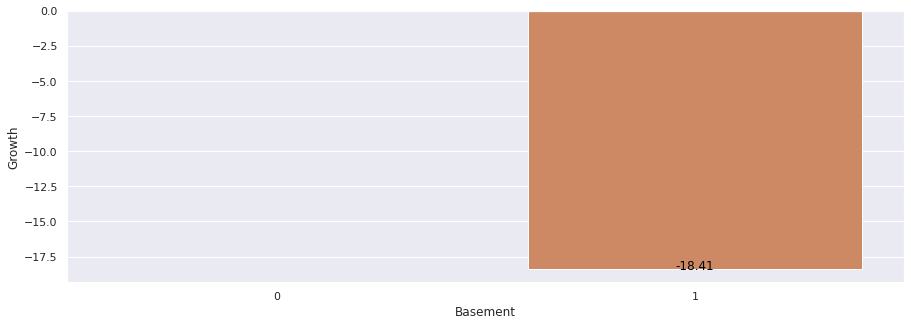

In [24]:
aux = df3.copy()

# 1 - have basement / 0 haven't basement
aux['basement'] = aux.apply(lambda x: 1 if x['sqft_basement'] > 0 else 0,axis=1) 

aux2 = aux[['basement','sqft_lot']].groupby('basement').mean().reset_index() 

aux2['growth'] = 100 * aux2['sqft_lot'].pct_change()

f = plt.figure(figsize=(15,5))
g = sns.barplot(x='basement', y='growth', data=aux2);

g.set_xlabel('Basement');
g.set_ylabel('Growth');


for index, row in aux2.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

plt.show();

In [25]:
aux2.head(5)

,basement,sqft_lot,growth
0,0,16284.176825,NaN
1,1,13286.294922,-18.409785


### **H4: YoY (Year Over Year) property price growth is 10%**

__False: Considering the low percentage, we can say that there was practically no growth.__ 

posx and posy should be finite values
posx and posy should be finite values


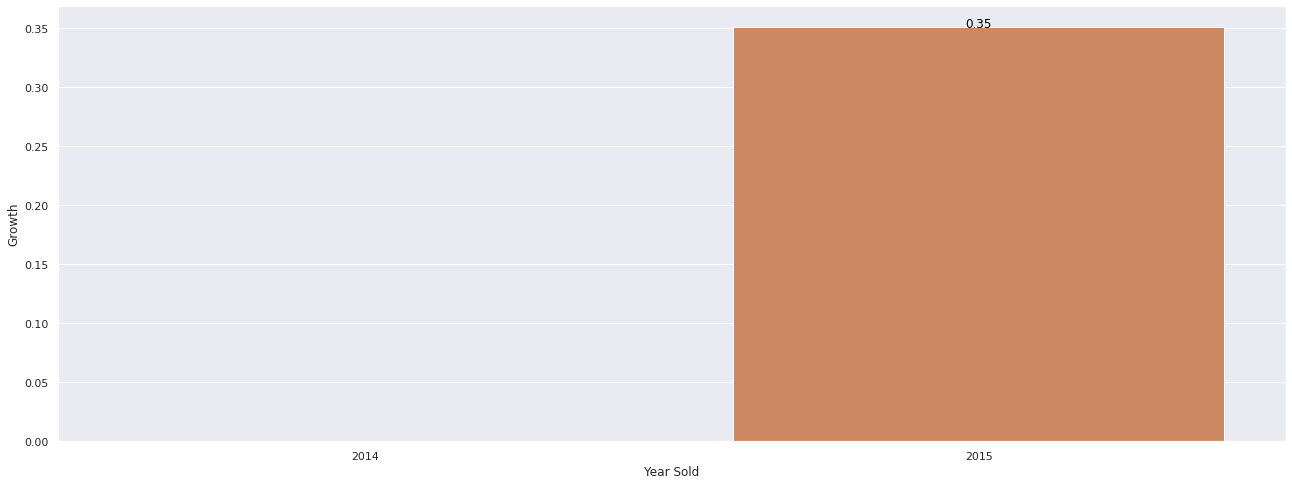

In [26]:
plt.figure(figsize=(22,8))
aux = df3[(df3['date'] >= '2014-05-02') & (df3['date'] <= '2015-05-02')] 
aux1 = aux[['year_sold','price']].groupby('year_sold').mean().reset_index()

aux1['growth'] = 100 * aux1['price'].pct_change()
g = sns.barplot(x='year_sold', y='growth', data=aux1);

g.set_xlabel('Year Sold');
g.set_ylabel('Growth');


for index, row in aux1.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

plt.show();

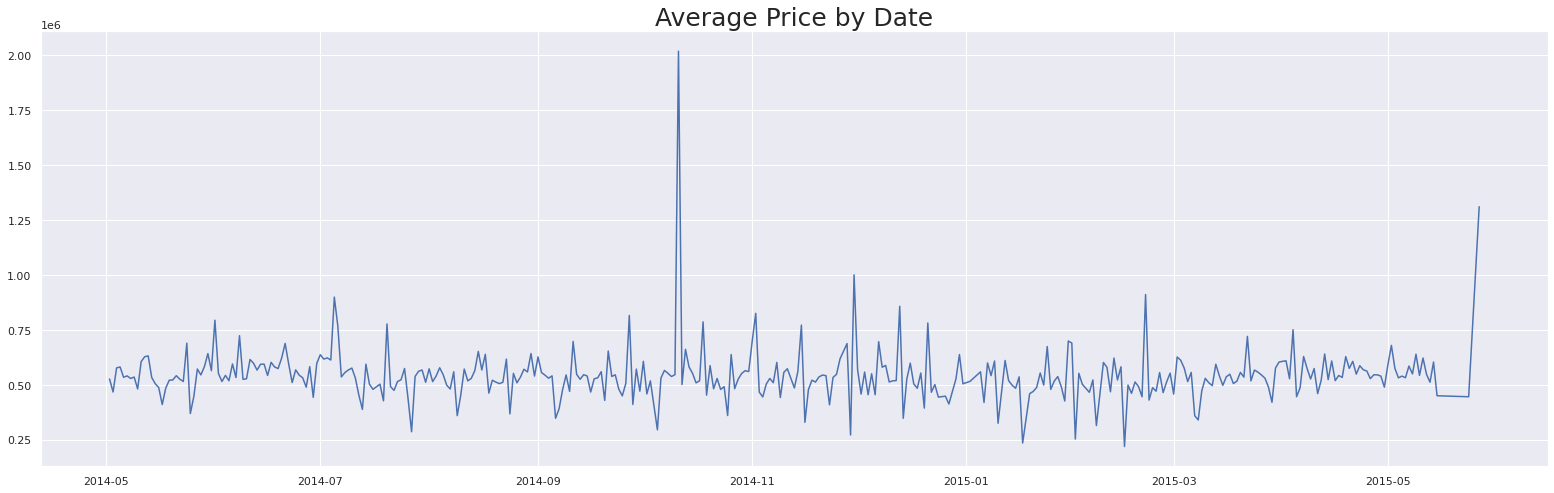

In [27]:
#The peak below is due to the fact that on 2014-10-11 a property worth 3,635,000 with 5 bedrooms, 
#6 bathrooms and a living room measuring 5,490 meters was sold, as well as another property worth 400,000
plt.figure(figsize=(27,8))
aux1 = df3[['date','price']].groupby('date').mean().reset_index()

plt.plot(aux1['date'], aux1['price']); 
plt.title("Average Price by Date",fontsize=25);

plt.show();

### **H5: Properties with 3 bathrooms have a MoM(Month over Month) growth of 15%.**

__False: The growth never reached 15% (the maximum was 13%), on the contrary, most of the time there was a drop.__ 

posx and posy should be finite values
posx and posy should be finite values


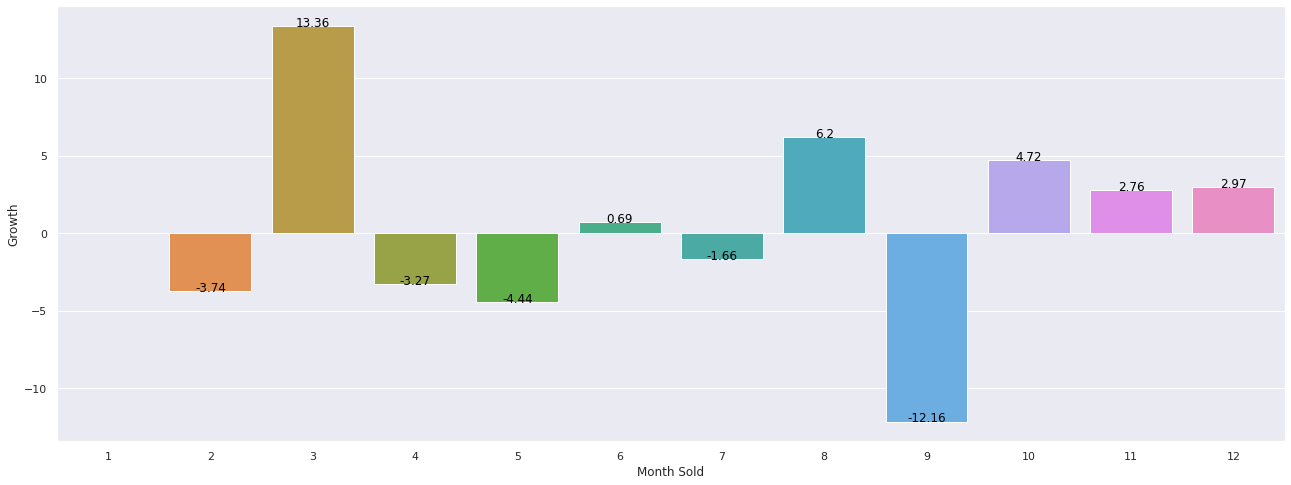

In [28]:
plt.figure(figsize=(22,8))
aux = df3[(df3['date'] >= '2014-05-02') & (df3['date'] <= '2015-05-02') & (df3['bathrooms'] == 3) ] 

aux1 = aux[['month_sold','price']].groupby(['month_sold']).mean().reset_index()

aux1['growth'] = 100 * aux1['price'].pct_change() 

#plt.subplot(3,1,1)
g = sns.barplot(x='month_sold', y='growth', data=aux1); 

g.set_xlabel('Month Sold');
g.set_ylabel('Growth');

for index, row in aux1.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

plt.show();

posx and posy should be finite values
posx and posy should be finite values


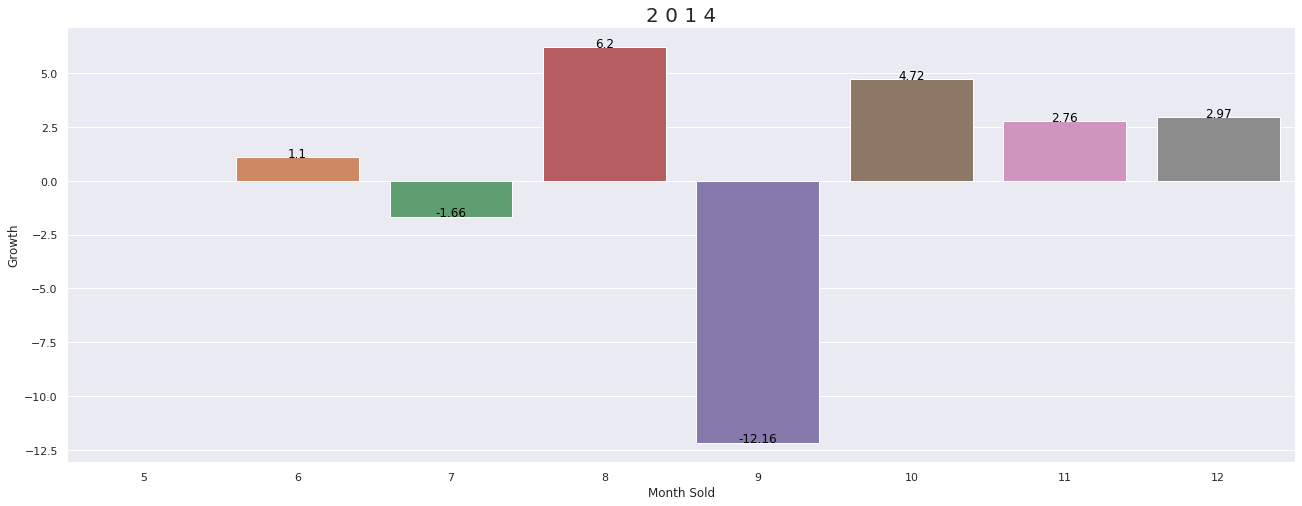

In [29]:
# 2014 
plt.figure(figsize=(22,8))
aux = df3[(df3['date'] >= '2014-05-02') & (df3['date'] <= '2015-05-02') & (df3['bathrooms'] == 3) & (df3['year_sold']==2014) ] 

aux1 = aux[['month_sold','price']].groupby(['month_sold']).mean().reset_index()

aux1['growth'] = 100 * aux1['price'].pct_change() 

#plt.subplot(3,1,2)
g = sns.barplot(x='month_sold', y='growth', data=aux1); 

g.set_title('2 0 1 4', fontsize=20);
g.set_xlabel('Month Sold');
g.set_ylabel('Growth');

for index, row in aux1.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

plt.show();

posx and posy should be finite values
posx and posy should be finite values


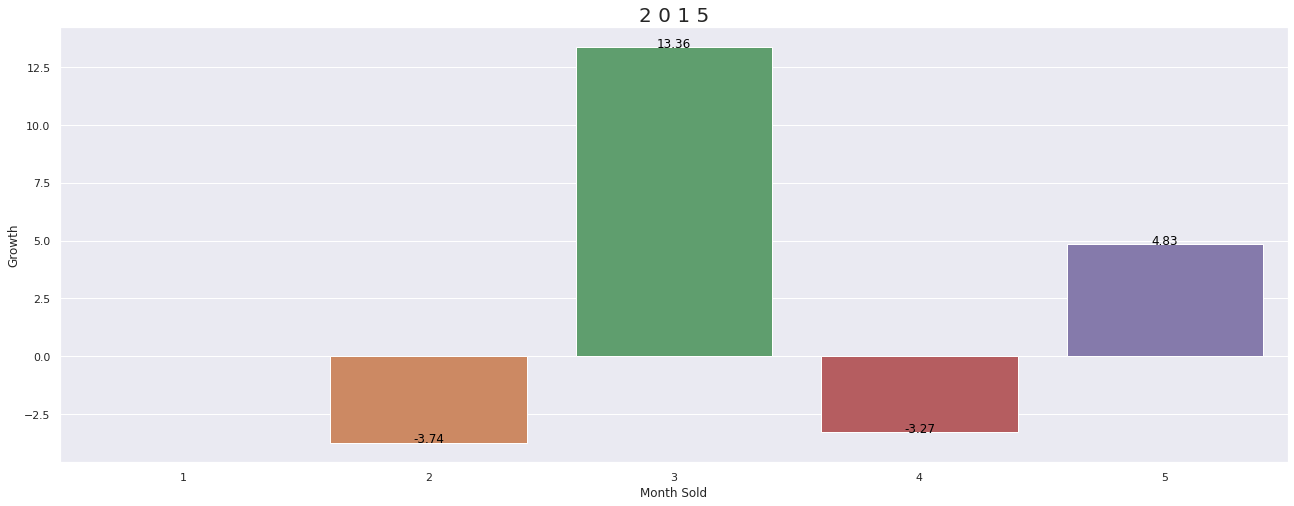

In [30]:
# 2015 
plt.figure(figsize=(22,8))
aux = df3[(df3['date'] >= '2014-05-02') & (df3['date'] <= '2015-05-02') & (df3['bathrooms'] == 3) & (df3['year_sold']==2015) ] 

aux1 = aux[['month_sold','price']].groupby(['month_sold']).mean().reset_index()

aux1['growth'] = 100 * aux1['price'].pct_change() 

#plt.subplot(3,1,3)
g = sns.barplot(x='month_sold', y='growth', data=aux1); 

g.set_title('2 0 1 5', fontsize=20);
g.set_xlabel('Month Sold');
g.set_ylabel('Growth');

for index, row in aux1.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

plt.show();

### **H6: Properties that have 3 bathrooms are 30% more expensive, on average.**

__False: Compared to properties with 1 or 2 bathrooms, the price is 60% higher.It is possible to observe that properties with more than 3 bathrooms have a very high (average) price.__ 

posx and posy should be finite values
posx and posy should be finite values


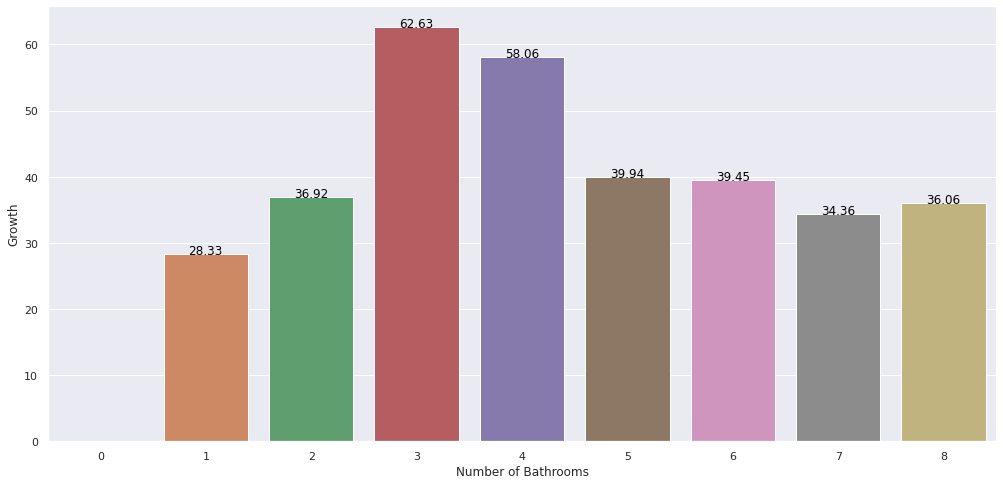

In [31]:
plt.figure(figsize=(17,8))
aux = df3[['bathrooms','price']].groupby('bathrooms').mean().reset_index()

aux['growth'] = 100 * aux['price'].pct_change()

g = sns.barplot(x='bathrooms', y='growth', data=aux); 

g.set_xlabel('Number of Bathrooms');
g.set_ylabel('Growth');

for index, row in aux.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

plt.show();

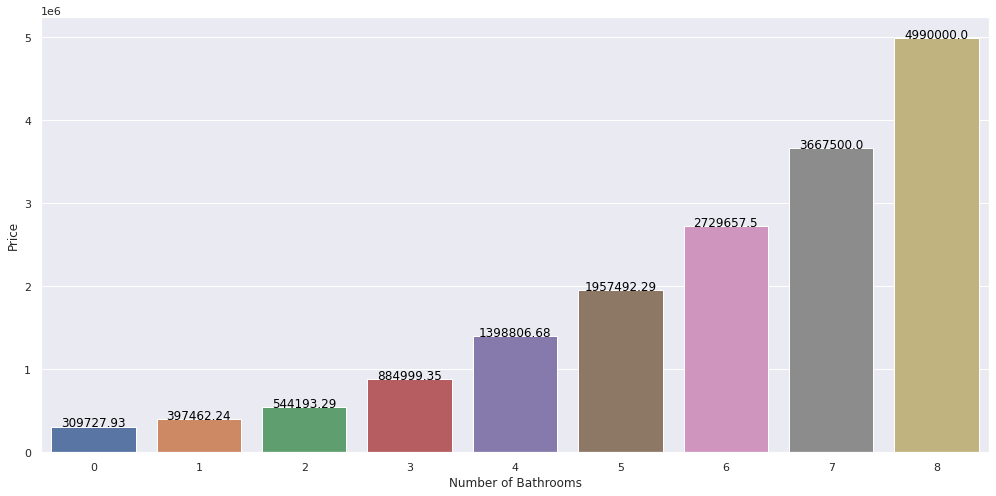

In [32]:
plt.figure(figsize=(17,8))
aux = df3[['bathrooms','price']].groupby('bathrooms').mean().reset_index()

aux['growth'] = 100 * aux['price'].pct_change()

g = sns.barplot(x='bathrooms', y='price', data=aux); 

g.set_xlabel('Number of Bathrooms');
g.set_ylabel('Price');

for index, row in aux.iterrows():
    g.text(row.name,row.price, round(row.price,2), color='black', ha="center")

plt.show();

### **H7: Properties that have 2 floors are 30% more expensive, on average.**

__False: Properties with 2 floors are 42% more expensive.__ 

posx and posy should be finite values
posx and posy should be finite values


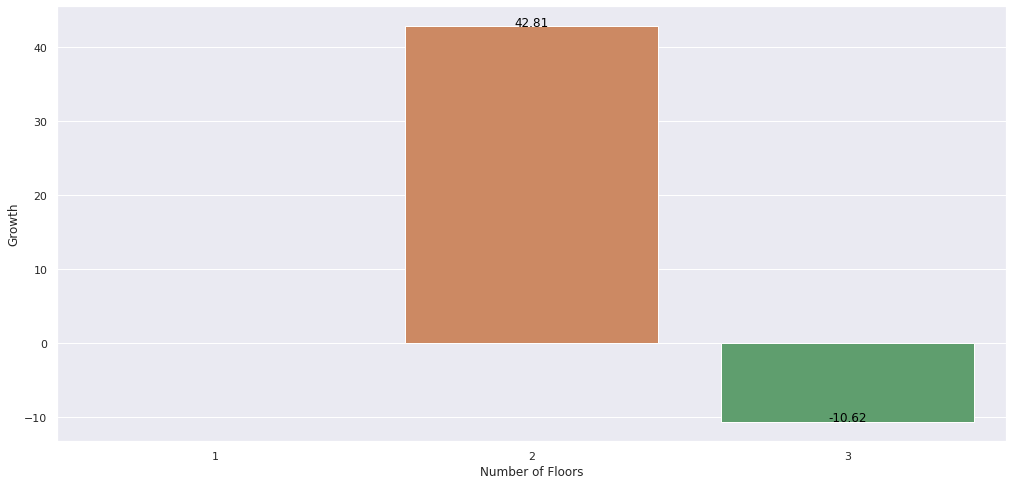

In [33]:
plt.figure(figsize=(17,8))
aux = df3[['floors','price']].groupby('floors').mean().reset_index()

aux['growth'] = 100 * aux['price'].pct_change()

g = sns.barplot(x='floors', y='growth', data=aux);

g.set_xlabel('Number of Floors');
g.set_ylabel('Growth');

for index, row in aux.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

plt.show();

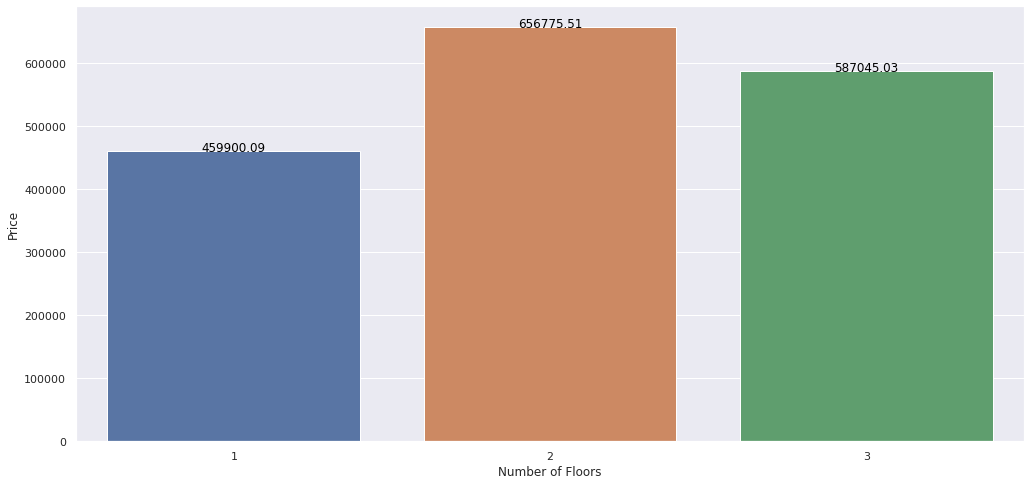

In [34]:
plt.figure(figsize=(17,8))
aux = df3[['floors','price']].groupby('floors').mean().reset_index()

aux['growth'] = 100 * aux['price'].pct_change()

g = sns.barplot(x='floors', y='price', data=aux);

g.set_xlabel('Number of Floors');
g.set_ylabel('Price');

for index, row in aux.iterrows():
    g.text(row.name,row.price, round(row.price,2), color='black', ha="center")

plt.show();

### **H8: Properties are 15% more expensive on average, depending on their condition**

__False: The growth in prices is not increasing, on the contrary, the average price of properties with conditions 3 and 5 is high.__ 

posx and posy should be finite values
posx and posy should be finite values


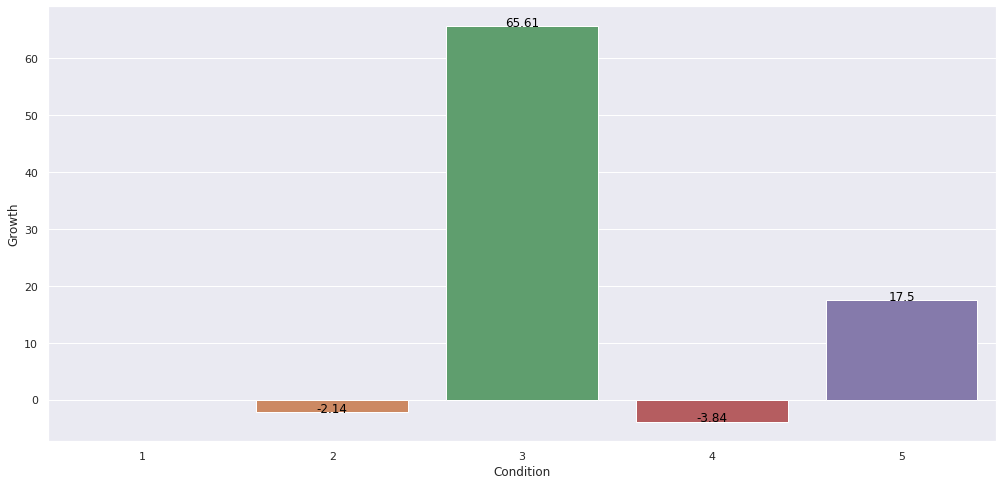

In [35]:
plt.figure(figsize=(17,8))
aux = df3[['condition','price']].groupby('condition').mean().reset_index()

aux['growth'] = 100 * aux['price'].pct_change()

g = sns.barplot(x='condition', y='growth', data=aux);

g.set_xlabel('Condition');
g.set_ylabel('Growth');

for index, row in aux.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

plt.show();

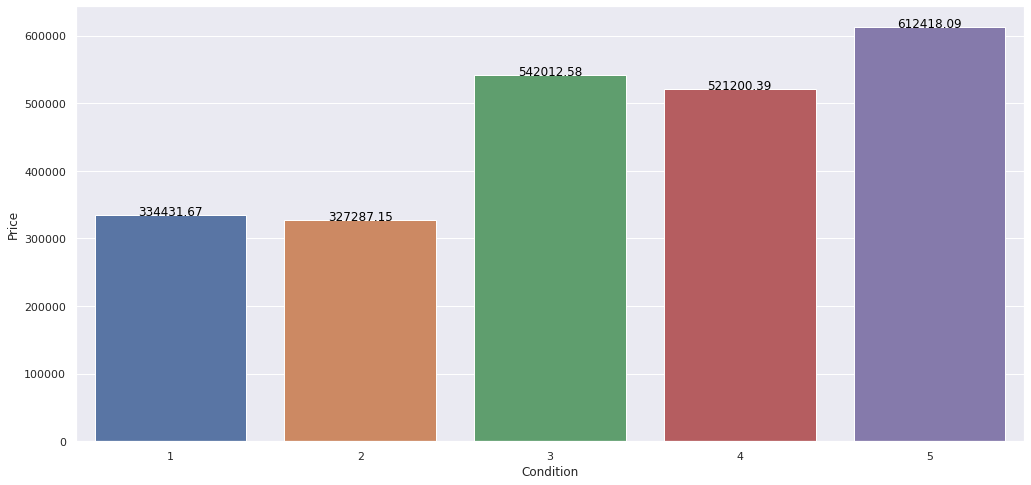

In [36]:
plt.figure(figsize=(17,8))
aux = df3[['condition','price']].groupby('condition').mean().reset_index()

aux['growth'] = 100 * aux['price'].pct_change()

g = sns.barplot(x='condition', y='price', data=aux);

g.set_xlabel('Condition');
g.set_ylabel('Price');

for index, row in aux.iterrows():
    g.text(row.name,row.price, round(row.price,2), color='black', ha="center")

plt.show();

### **H9: Properties are 30% more expensive in the summer, on average**

__False: The average price per season is equal and is not increasing.__ 

posx and posy should be finite values
posx and posy should be finite values


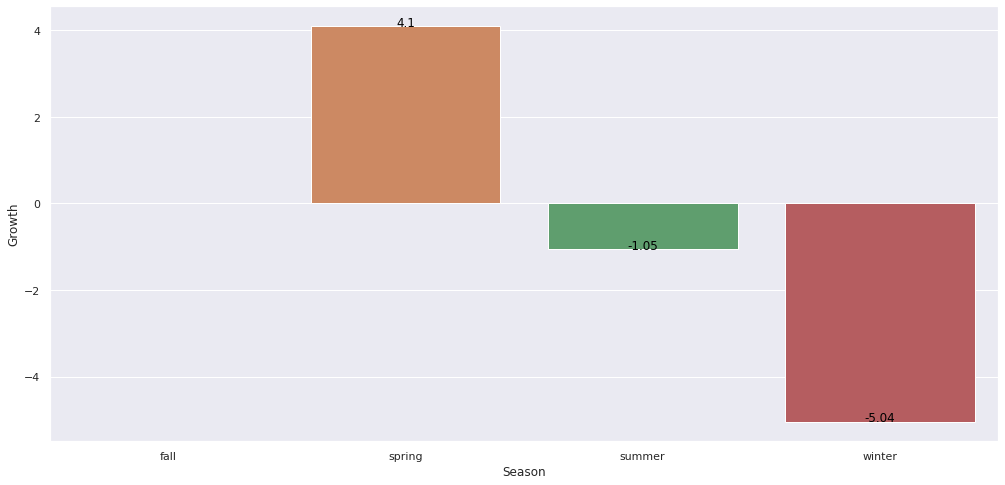

In [37]:
plt.figure(figsize=(17,8))
aux = df3[['season','price']].groupby('season').mean().reset_index()

aux['growth'] = 100 * aux['price'].pct_change()

g = sns.barplot(x='season', y='growth', data=aux); 

g.set_xlabel('Season');
g.set_ylabel('Growth');

for index, row in aux.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

plt.show();

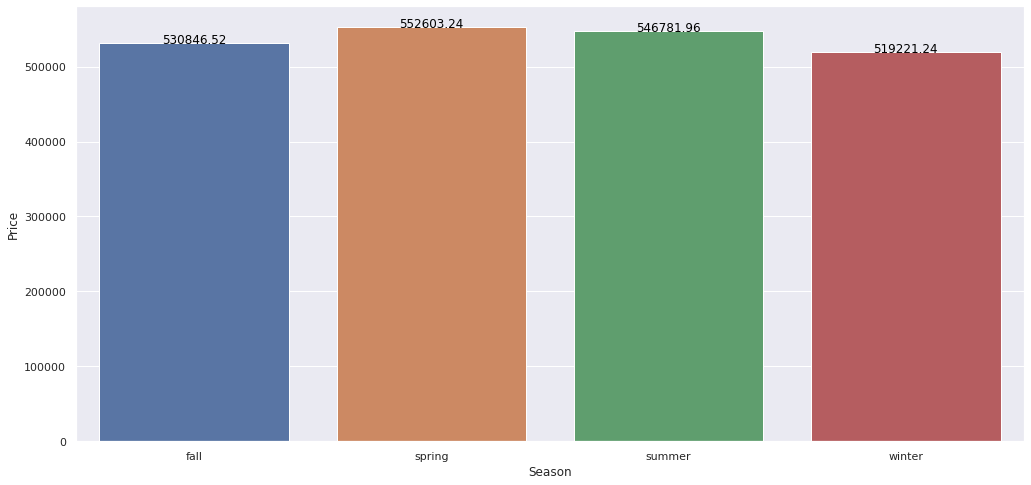

In [38]:
plt.figure(figsize=(17,8))
aux = df3[['season','price']].groupby('season').mean().reset_index()

aux['growth'] = 100 * aux['price'].pct_change()

g = sns.barplot(x='season', y='price', data=aux); 

g.set_xlabel('Season');
g.set_ylabel('Price');

for index, row in aux.iterrows():
    g.text(row.name,row.price, round(row.price,2), color='black', ha="center")

plt.show();

## 3.3 Multivariate Analysis

### 3.3.1 Numerical Attributes

In [39]:
#Select numerical attributes
n_attributes = df3.select_dtypes( exclude=['object','datetime64[ns]'] )

#Drop column 'id'
cols_drop = ['id']
n_attributes = n_attributes.drop( cols_drop, axis=1 )

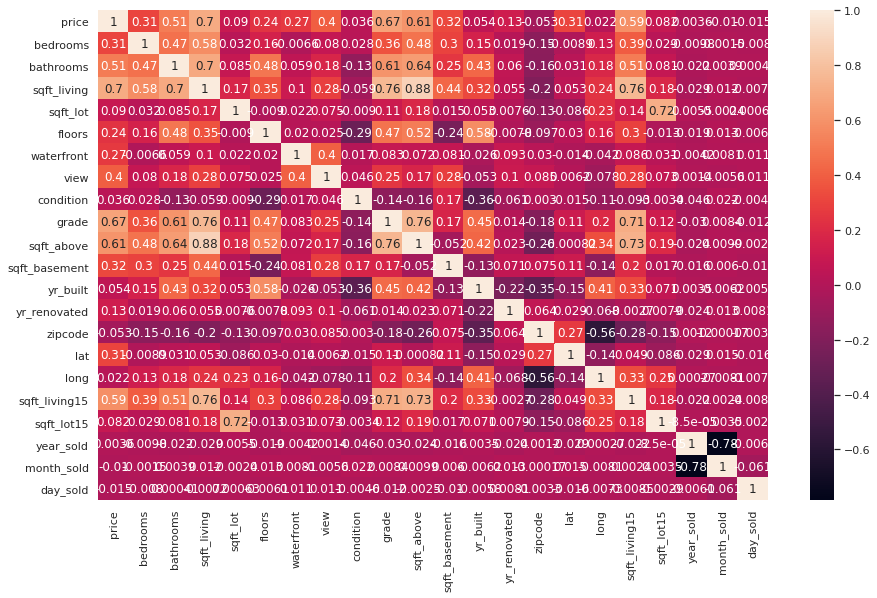

In [40]:
f = figsize(15,9) 

#Pearson's Correlation
correlation = n_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

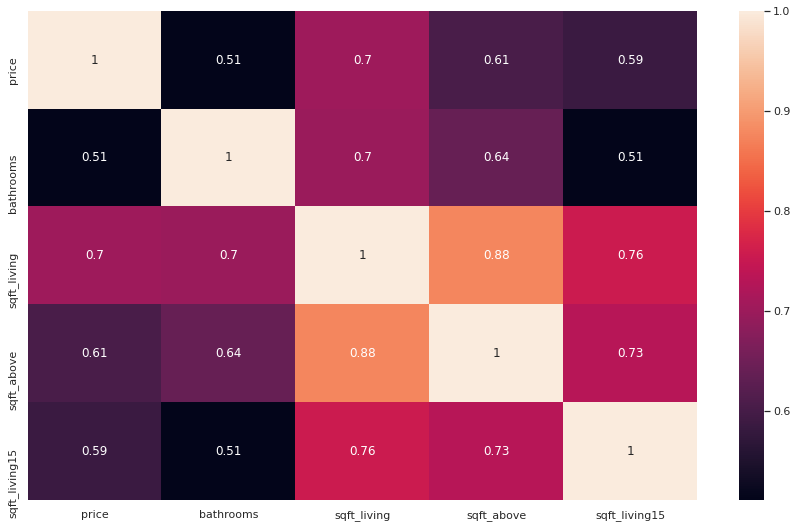

In [41]:
f = figsize(15,9) 

#Pearson's Correlation
a = n_attributes[['price','bathrooms','sqft_living','sqft_above','sqft_living15']]
correlation = a.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

In [42]:
n_attributes

Output hidden; open in https://colab.research.google.com to view.

# 4. Solution 
Statement of results in .csv format.

## 4.1 First suggestion: properties that are below the median price for each region and that are in good condition (condition) should be purchased.

In [43]:
df4 = df3.copy()

In [44]:
#grouping by zipcode
data = df4[['zipcode','price']].groupby('zipcode').median().reset_index() 

#rename columns
data = data.rename(columns={"zipcode": "zipcode","price": "median_price_zipcode"})

#merge datasets
df = pd.merge(data, df4, on='zipcode', how='inner') 

#converting to int64
df['median_price_zipcode'] = df['median_price_zipcode'].astype(int64)
df['price'] = df['price'].astype(int64)

#running through the entire dataset checking price and condition
for i in range(len(df)):
  if ( df.loc[i, 'price'] < df.loc[i, 'median_price_zipcode']) & (df.loc[i, 'condition'] >= 3):
    df.loc[i, 'status'] = 'Buy'
  else: 
    df.loc[i, 'status'] = 'Not Buy' 

#final dataset
df1_final = df[['id','zipcode','price','median_price_zipcode','condition','status']].copy()

#export to csv
df1_final.to_csv("houses_to_buy.csv")

In [45]:
df1_final.head(5)

,id,zipcode,price,median_price_zipcode,condition,status
0,7895500070,98001,240000,260000,2,Not Buy
1,3717000160,98001,287000,260000,3,Not Buy
2,8961960160,98001,480000,260000,3,Not Buy
3,4014400292,98001,465000,260000,3,Not Buy
4,1115450240,98001,360000,260000,3,Not Buy


## 4.2 Here we will consider two conditions:

1 - if the purchase price is greater than the region median + seasonality, then: the sale price will be equal to the purchase price + 10%.

2 - if the purchase price is less than the region median + seasonality, then: the sale price will be equal to the purchase price + 30%.

In [46]:
#grouping by zipcode and season
data2 = df4[['zipcode','season','price']].groupby(['zipcode','season']).median().reset_index() 
data2 = data2.rename(columns={"zipcode": "zipcode","price": "median_price_season"})

#merge datasets
df2 = pd.merge(data2, df4, on=['zipcode','season'], how='inner') 

df2['median_price_season'] = df2['median_price_season'].astype(int64)
df2['price'] = df2['price'].astype(int64)

#generating the condition to sell 
for i in range(len(df2)):
  if ( df2.loc[i, 'price'] > df2.loc[i, 'median_price_season'] ):
    df2.loc[i, 'price_to_sell'] = df2.loc[i, 'price'] + (0.1 * df2.loc[i, 'price'])
  else: 
    df2.loc[i, 'price_to_sell'] = df2.loc[i, 'price'] + (0.3 * df2.loc[i, 'price']).astype(int64)

df2['price_to_sell'] = df2['price_to_sell'].astype(int64) 

In [47]:
#profit price to sell 
df2['profit'] = np.round((df2['price_to_sell'] - df2['price']) ).astype(int64)
df2['profit_percentage'] = np.round(((df2['price_to_sell'] / df2['price']) - 1) * 100).astype(int64)

#merge datasets
df2_final = pd.merge(df2, df1_final, on='id', how='inner') 

#filtering properties to buy
df2_final = df2_final[df2_final['status'] == 'Buy']

#final dataset
df2_final = df2_final[['id','zipcode_x','season','price_x','median_price_season','price_to_sell','profit','profit_percentage','condition_x','status']].copy()

#export to csv
df2_final.to_csv("houses_to_sell.csv")

In [48]:
df2_final.head(5)

,id,zipcode_x,season,price_x,median_price_season,price_to_sell,profit,profit_percentage,condition_x,status
3,3353401710,98001,fall,227950,249900,296335,68385,30,5,Buy
4,7967200060,98001,fall,243000,249900,315900,72900,30,4,Buy
5,8159610060,98001,fall,233000,249900,302900,69900,30,3,Buy
6,5066400483,98001,fall,249900,249900,324870,74970,30,4,Buy
7,3329530200,98001,fall,205000,249900,266500,61500,30,3,Buy


In [49]:
print('Total Properties: {} \nPrice to Buy: {:,.2f} \nPrice to Sell: {:,.2f} \nProfit: {:,.2f}'.format(len(df2_final), 
                                                                                                       df2_final['price_x'].sum(), 
                                                                                                       df2_final['price_to_sell'].sum(), 
                                                                                                       df2_final['profit'].sum() ))

Total Properties: 10799 
Price to Buy: 4,175,155,857.00 
Price to Sell: 5,384,878,619.00 
Profit: 1,209,722,762.00


## 4.3 Houses that need a reform

In [50]:
df3_final = df2_final.copy()

#using Lambda function to define the reform or not reform
df3_final['reform'] = df3_final.apply( lambda x: 'reform' if ((x['profit_percentage'] <=10) and ( x['condition_x'] == 3 or x['condition_x'] == 4 )) else 'not reform' , axis=1 )

In [51]:
#export to csv
df3_final.to_csv("houses_to_reform.csv")

In [52]:
df3_final.sample(5)

,id,zipcode_x,season,price_x,median_price_season,price_to_sell,profit,profit_percentage,condition_x,status,reform
14254,7550800916,98107,summer,395000,519500,513500,118500,30,3,Buy,not reform
4454,8944360170,98029,fall,517500,562400,672750,155250,30,3,Buy,not reform
16498,1231000640,98118,fall,290000,342500,377000,87000,30,3,Buy,not reform
16525,3336000170,98118,fall,335000,342500,435500,100500,30,4,Buy,not reform
19639,5245600105,98148,fall,228000,267000,296400,68400,30,3,Buy,not reform


In [53]:
#filtering properties to reform 
to_reform = df3_final[df3_final['reform']=='reform']

#10% increase in price_to_sell
price_post_reform = np.sum(to_reform['price_to_sell'] + (to_reform['price_to_sell'] * 0.10))

#profit post reform
profit = np.sum( price_post_reform - np.sum(to_reform['price_to_sell'] ) )
print('Properties to Reform: {} \nPrice to Buy: {:,.2f} \nPrice to Sell: {:,.2f} \nPrice to Sell Post Reform: {:,.2f} \nProfit: {:,.2f}'.format(len(to_reform), 
                                          to_reform['price_x'].sum(), 
                                          to_reform['price_to_sell'].sum(), 
                                          price_post_reform, 
                                          profit ) )

Properties to Reform: 400 
Price to Buy: 191,217,977.00 
Price to Sell: 210,339,773.00 
Price to Sell Post Reform: 231,373,750.30 
Profit: 21,033,977.30
